In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

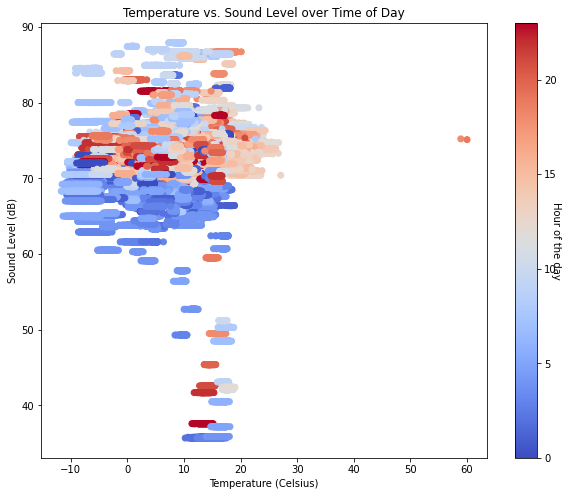

In [3]:
lc2022 = pd.read_csv('LC_2022Q4.csv')
#print(lc2022.head())

his_hears_40 = pd.read_csv('export_40/csv_results_40_303910_mp-04-his-hears.csv', sep = ';')
#print(his_hears_40.head())

his_hears_40['result_timestamp'] = pd.to_datetime(his_hears_40['result_timestamp'], format='%d/%m/%Y %H:%M:%S.%f')
his_hears_40['result_timestamp'] = his_hears_40['result_timestamp'].dt.strftime('%Y-%m-%d %H:%M:%S')

# Join the two dataframes 
lc2022_his_hears_40 = pd.merge(lc2022, his_hears_40, left_on='DATEUTC', right_on='result_timestamp')
#print(lc2022_his_hears_40.head())

lc2022_his_hears_40['DATEUTC'] = pd.to_datetime(lc2022_his_hears_40['DATEUTC'])

lc2022_his_hears_40['hour'] = lc2022_his_hears_40['DATEUTC'].dt.hour

fig, ax = plt.subplots(figsize=(10, 8))

# Create a scatter plot with LC_TEMP_QCL0 on the x-axis and laf005_per_hour on the y-axis
scatter = ax.scatter(lc2022_his_hears_40['LC_TEMP_QCL0'], lc2022_his_hears_40['laf005_per_hour'], c=lc2022_his_hears_40['hour'], cmap='coolwarm')

# Set the x-axis and y-axis labels
ax.set_xlabel('Temperature (Celsius)')
ax.set_ylabel('Sound Level (dB)')

# Set the colorbar to show the timestamps
cbar = fig.colorbar(ax.collections[0])
cbar.ax.set_ylabel('Hour of the day', rotation=270)

# Set the plot title
plt.title('Temperature vs. Sound Level over Time of Day')

# Show the plot
plt.show()


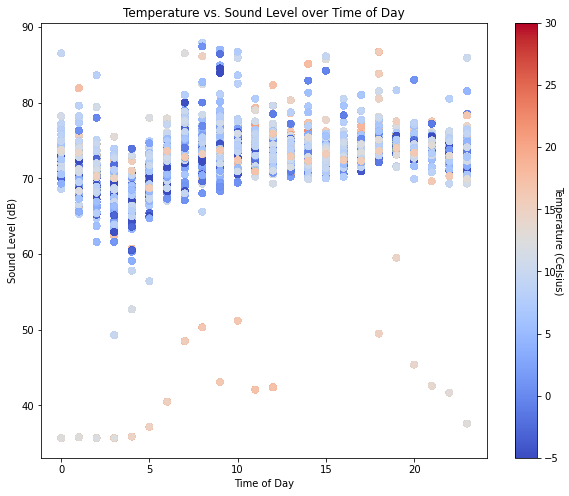

In [12]:

fig, ax = plt.subplots(figsize=(10, 8))

# Create a scatter plot with LC_TEMP_QCL0 on the x-axis and laf005_per_hour on the y-axis
scatter = ax.scatter(lc2022_his_hears_40['hour'], lc2022_his_hears_40['laf005_per_hour'], c=lc2022_his_hears_40['LC_TEMP_QCL0'], cmap='coolwarm', vmin = -5, vmax = 30)

# Set the x-axis and y-axis labels
ax.set_xlabel('Time of Day')
ax.set_ylabel('Sound Level (dB)')

# Set the colorbar to show the temperature values
cbar = fig.colorbar(ax.collections[0])
cbar.ax.set_ylabel('Temperature (Celsius)', rotation=270)

# Set the plot title
plt.title('Temperature vs. Sound Level over Time of Day')

# Show the plot
plt.show()


<ipython-input-15-a850691e3e78>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.arange(24))


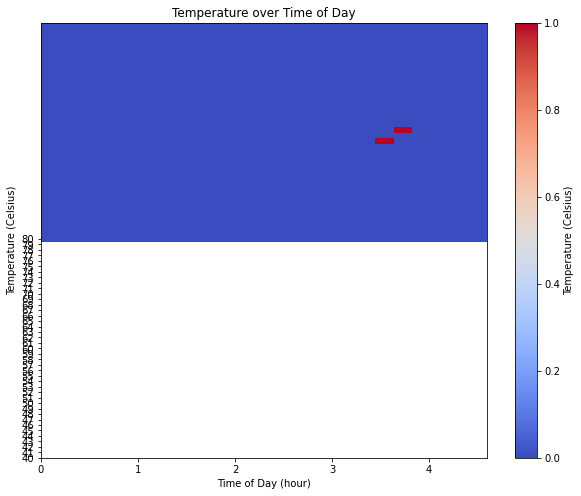

In [15]:
fig, ax = plt.subplots(figsize=(10, 8))

# Bin the temperature and sound level data into a grid
xbins = np.arange(0, 24, 1)
ybins = np.arange(40, 80, 1)
H, xedges, yedges = np.histogram2d(lc2022_his_hears_40['hour'], lc2022_his_hears_40['laf005_per_hour'], bins=(xbins, ybins), weights=lc2022_his_hears_40['LC_TEMP_QCL0'])

# Create a heatmap using the binned data
heatmap = ax.pcolor(H.T, cmap='coolwarm', vmin=-10, vmax=40)

# Set the x-axis and y-axis labels
ax.set_xlabel('Time of Day')
ax.set_ylabel('Sound Level (dB)')

# Set the tick labels for the x-axis and y-axis
ax.set_xticks(np.arange(len(xedges))+0.5)
ax.set_xticklabels(np.arange(24))
ax.set_yticks(np.arange(len(yedges))+0.5)
ax.set_yticklabels(np.arange(40, 81))

# Set the colorbar to show the temperature values
cbar = fig.colorbar(heatmap)
cbar.ax.set_ylabel('Temperature (Celsius)', rotation=270)

# Set the plot title
plt.title('Temperature vs. Sound Level over Time of Day')

# Show the plot
plt.show()


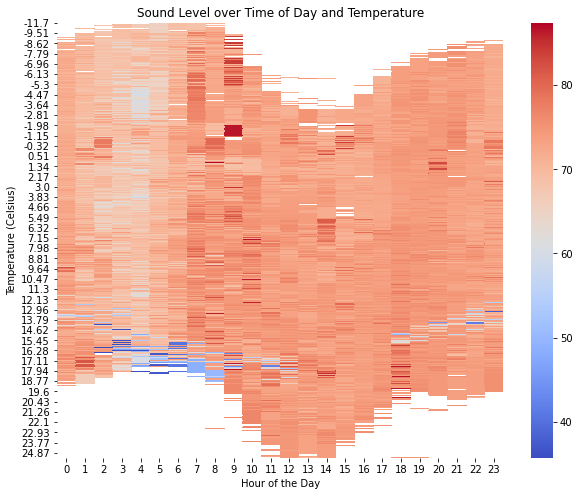

In [5]:
# Pivot the data to create a matrix of laf005_per_hour values by hour and LC_TEMP_QCL0 values by temperature
heatmap_data = lc2022_his_hears_40.pivot_table(index='LC_TEMP_QCL0', columns='hour', values='laf005_per_hour')

# Create a heatmap with seaborn
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', ax=ax)

# Set the x-axis and y-axis labels
ax.set_xlabel('Hour of the Day')
ax.set_ylabel('Temperature (Celsius)')

# Set the plot title
plt.title('Sound Level over Time of Day and Temperature')

# Show the plot
plt.show()

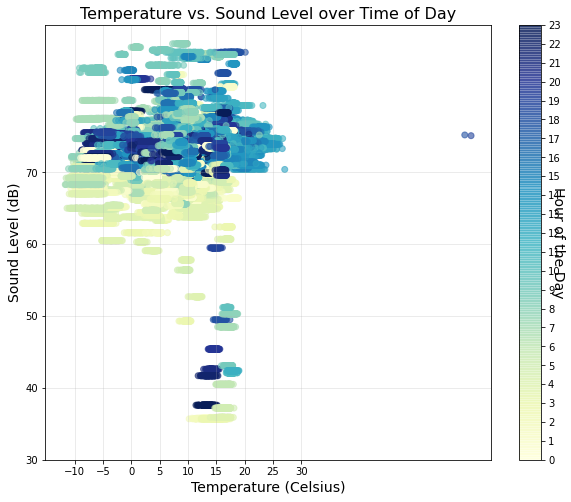

In [6]:

fig, ax = plt.subplots(figsize=(10, 8))

# Define a sequential colormap for time of day
cmap = plt.get_cmap('YlGnBu')
normalize = plt.Normalize(vmin=0, vmax=23)
colors = [cmap(normalize(value)) for value in lc2022_his_hears_40['hour']]

# Create a scatter plot with LC_TEMP_QCL0 on the x-axis and laf005_per_hour on the y-axis
scatter = ax.scatter(lc2022_his_hears_40['LC_TEMP_QCL0'], lc2022_his_hears_40['laf005_per_hour'], c=lc2022_his_hears_40['hour'], cmap=cmap, alpha=0.6)

# Set the x-axis and y-axis labels
ax.set_xlabel('Temperature (Celsius)', fontsize=14)
ax.set_ylabel('Sound Level (dB)', fontsize=14)

# Add axis ticks and grid
ax.set_xticks(range(-10, 35, 5))
ax.set_yticks(range(30, 80, 10))
ax.grid(axis='both', alpha=0.3)

# Set the colorbar to show the hours of the day
cbar = fig.colorbar(scatter, ax=ax)
cbar.set_ticks(range(0, 24))
cbar.set_label('Hour of the Day', rotation=270, fontsize=14)

# Set the plot title
plt.title('Temperature vs. Sound Level over Time of Day', fontsize=16)

# Show the plot
plt.show()

In [7]:
#Find the correlations between laf005_per_hour and time of day
print(lc2022_his_hears_40[['hour', 'laf005_per_hour']].corr())

                     hour  laf005_per_hour
hour             1.000000         0.275609
laf005_per_hour  0.275609         1.000000


<ipython-input-8-e31c3fbd8db3>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([str(t) for t in correlations.index])


[Text(0, 0, 'LC_TEMP_QCL0'), Text(1, 0, 'laf005_per_hour')]

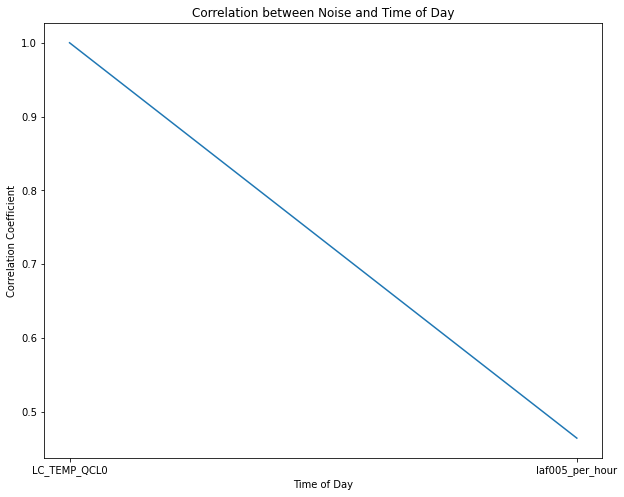

In [8]:
# Select the 'temperature' and 'noise' columns from the dataframe
df_temp_noise = lc2022_his_hears_40[['LC_TEMP_QCL0', 'laf005_per_hour']]

# Group the data by time of day and calculate the mean for each group
df_temp_noise_by_time = df_temp_noise.groupby(lc2022_his_hears_40['hour']).mean()

# Calculate the correlation between temperature and noise at each time of day
correlations = df_temp_noise_by_time.corr()
# Select the 'noise' column from the correlations dataframe
correlations = correlations.loc['LC_TEMP_QCL0', :]

# Create a line plot to show the correlations over time of day
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(correlations.index, correlations.values)

# Set the x-axis and y-axis labels
ax.set_xlabel('Time of Day')
ax.set_ylabel('Correlation Coefficient')
ax.set_title('Correlation between Noise and Time of Day')

# Set the x-axis tick labels to show the time of day
ax.set_xticklabels([str(t) for t in correlations.index])


<ipython-input-9-68493fdb3c58>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  correlations = lc2022_his_hears_40.groupby('hour')['LC_TEMP_QCL0', 'laf005_per_hour'].corr().iloc[0::2,-1]


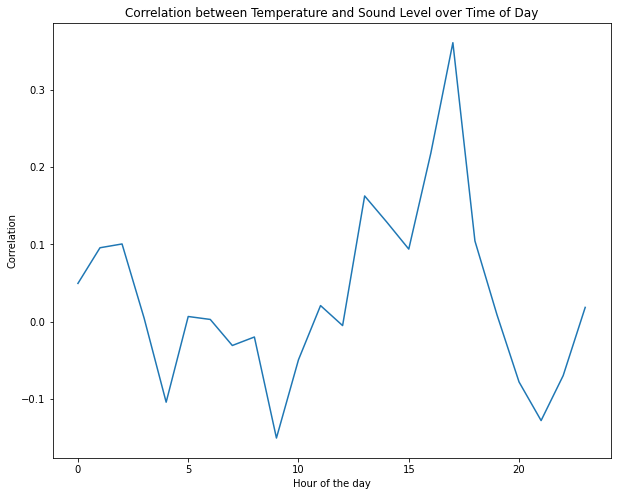

In [9]:
# Calculate the correlation between temperature and sound level for each hour of the day
correlations = lc2022_his_hears_40.groupby('hour')['LC_TEMP_QCL0', 'laf005_per_hour'].corr().iloc[0::2,-1]

# Convert tuples to floats using a loop
correlations = [float(correlation) for correlation in correlations]

# Create a line plot to show the correlations over time of day
fig, ax = plt.subplots(figsize=(10, 8))

ax.plot(range(24), correlations)

# Set the x-axis and y-axis labels
ax.set_xlabel('Hour of the day')
ax.set_ylabel('Correlation')

# Set the plot title
plt.title('Correlation between Temperature and Sound Level over Time of Day')

# Show the plot
plt.show()